In [33]:
import numpy as np
import pandas as pd

# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:

data_path = '/content/drive/MyDrive/MachineLearning/data/ndtv_data_final.csv'
df = pd.read_csv(data_path, index_col=0)
df.head()


,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [22]:
df.columns

Index(['Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [29]:

df['RAM'] = df['RAM (MB)']  / 1000
df.drop(['Name', 'Model', 'RAM (MB)'], axis=1, inplace=True)


df['Price'] = df['Price'] * 0.011

In [31]:
df.shape

(1359, 19)

In [32]:
df.isna().sum()

,0
Brand,0
Battery capacity (mAh),0
Screen size (inches),0
Touchscreen,0
Resolution x,0
Resolution y,0
Processor,0
Internal storage (GB),0
Rear camera,0
Front camera,0


In [30]:
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price,RAM
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,30.654864,12.070199,7.037969,1.833701,126.124082,2.488778
std,873.514133,0.671357,270.707271,557.780120,2.196562,36.950241,8.948337,6.295448,0.374457,152.432468,1.664440
min,1010.000000,2.400000,240.000000,320.000000,1.000000,0.064000,0.000000,0.000000,1.000000,5.434000,0.064000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,8.000000,8.000000,2.000000,2.000000,52.398500,1.000000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,16.000000,12.200000,5.000000,2.000000,76.989000,2.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,32.000000,13.000000,8.000000,2.000000,131.989000,3.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,512.000000,108.000000,48.000000,3.000000,1924.890000,12.000000


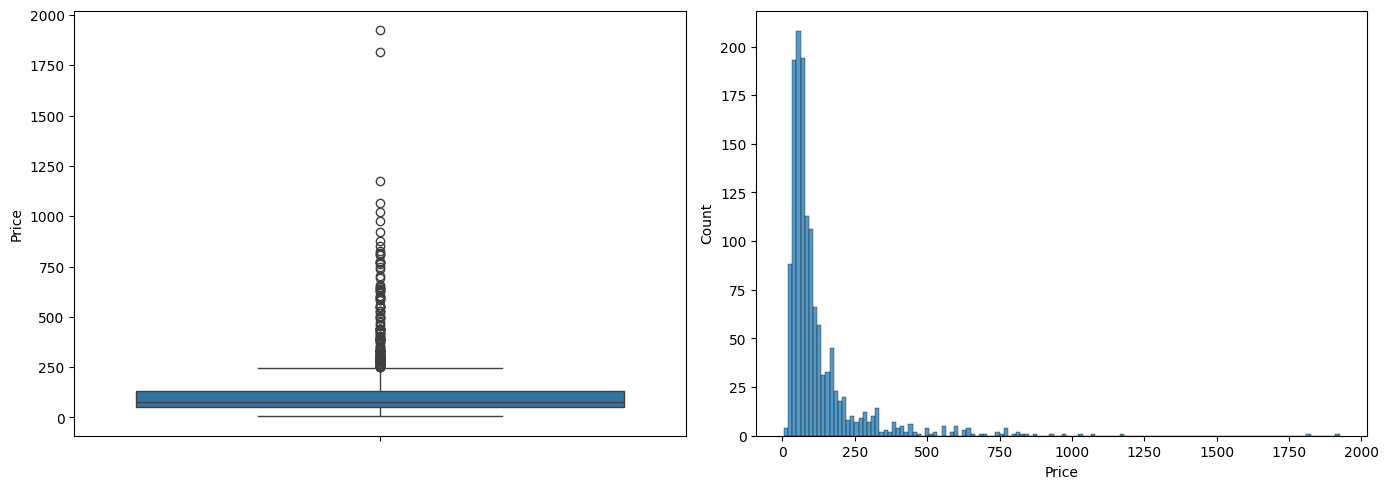

In [36]:
plt.figure(figsize=(14,5))

plt.subplot(122)
sns.histplot(df['Price'])
plt.subplot(121)
sns.boxplot(df['Price'])

plt.tight_layout()
plt.show()